# Fichiers météorologiques

Pour le réaliser sans installation, depuis un navigateur :
<a href="https://colab.research.google.com/github/eddes/INSA/blob/main/python/tuto_meteostat.ipynb"> ça se passe ici<a>

Dans de nombreuses applications, il est appréciable de disposer d'un fichier météorologique sur une période donnée. Le package python <a href="https://pypi.org/project/meteostat/"> meteostat<a> permet d'aller chercher de la donnée librement sur le net.
    
## Utilisation de meteostat
    
En prérequis, un petit `pip install meteostat` en console afin d'installer le package meteostat.


In [1]:
# -*- coding: utf-8 -*-
from datetime import datetime
from meteostat import Hourly
from meteostat import Stations
 
# on instancie+balayge stations
stations = Stations()
stations = stations.region('FR') # pour changer de pays on farfouillera dans la doc https://pypi.org/project/meteostat/
nb_stations=stations.count()
print('Stations in France:', nb_stations)

# on recupere les stations
stations = stations.fetch(nb_stations)
# on affiche pour voir
print(stations)
#  qui est là ?
print('\n\n\n Quelles villes ?',stations['name'])

#  que contient le dataframe ?
print('\n\n\n Quel contenu ?',stations.keys())

# depuis quand a-t-on des mesures ?
print('\n\n\nMesures depuis ?',stations['monthly_start'])

# dates souhaitees
an=2016
start = datetime(an, 1, 1)
end = datetime(an, 12, 31, 23, 59)

#ensuite on telecharge les donnees
data = Hourly(stations.index[0], start, end)
data = data.fetch()

Stations in France: 223
                                                    name country region  \
id                                                                        
07002                                           Boulogne      FR      O   
07003                                         Le Touquet      FR      O   
07005                                          Abbeville      FR      S   
07010                                          Dunkerque      FR      O   
07015                                              Lille      FR      O   
...                                                  ...     ...    ...   
LFRV0                                      Vannes-Meucon      FR      E   
LFSG0                               Epinal / Baudricourt      FR      M   
LFSM0  Montbéliard-Courcelles / Montbeliard-Courcelle...      FR      I   
LFYD0                                           Damblain      FR      G   
LFYL0                                 Lure / Froideterre      FR      I   



La variable `data` est un dataframe qui contient les données météorologiques souhaitées :

In [10]:
data.keys()

Index(['temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'coco'],
      dtype='object')

In [11]:
data.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,8742.000000,8742.000000,8742.000000,5451.000000,0.0,8629.000000,8742.000000,0.0,8740.000000,0.0,0.0
mean,11.195802,7.750435,80.347861,0.107595,NaN,187.641673,19.496877,NaN,1016.552700,NaN,NaN
std,5.359914,5.602868,12.522019,0.612264,NaN,93.847293,10.966381,NaN,10.247315,NaN,NaN
min,-3.900000,-13.000000,26.000000,0.000000,NaN,10.000000,0.000000,NaN,978.700000,NaN,NaN
25%,7.200000,3.525000,73.000000,0.000000,NaN,120.000000,11.200000,NaN,1010.800000,NaN,NaN
50%,10.600000,7.800000,82.000000,0.000000,NaN,200.000000,18.400000,NaN,1017.900000,NaN,NaN
75%,15.500000,12.400000,90.000000,0.000000,NaN,250.000000,25.900000,NaN,1023.500000,NaN,NaN
max,31.900000,20.200000,100.000000,23.000000,NaN,360.000000,83.500000,NaN,1046.000000,NaN,NaN


<Axes: xlabel='time'>

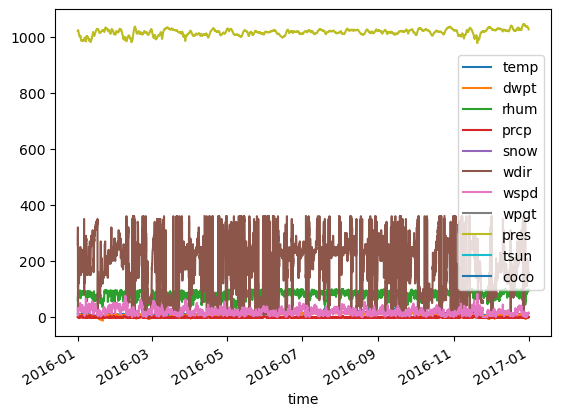

In [14]:
# et on peut même faire un graphique de tout ça
data.plot()

## Exercice

À vous de jouer : faites une boucle qui télécharge les fichiers météorologique pour la  station de votre choix. On sauvegardera en `.csv` avec   `data.to_csv('./meteo2016_ville_de_votre_choix.csv")`